## Sales analytics

In [1]:
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



## Load Data

In [2]:
import pandas as pd

## Clean Data

In [3]:
# Read json file
df = pd.read_json("sales.json")

# store values in each column
df['id'] = df['_id'].str.get('$oid')
df['saleDate'] = df['saleDate'].str.get('$date')

# Flatten the "customer" column
df = df.join(pd.json_normalize(df['customer']).add_prefix('customer_'))
df = df.drop('customer', axis=1)

# Convert 'saleDate' to datetime with the appropriate format
df['saleDate'] = pd.to_datetime(df['saleDate'], format='ISO8601', dayfirst=True)
df['date'] = pd.to_datetime(df['saleDate'].dt.strftime('%Y-%m-%d'))

# Drop the original "customer" column
df = df.explode('items')
df['product_name'] = df['items'].apply(lambda x: x['name'])
df['product_tags'] = df['items'].apply(lambda x: x['tags'])
df['product_qty'] = df['items'].apply(lambda x: x['quantity'])
df['price'] = df['items'].apply(lambda x: x['price']['$numberDecimal'])
df['sales'] = df['items'].apply(lambda x: x['quantity'] * float(x['price']['$numberDecimal']))

df = df.drop('items', axis=1)

df

,_id,saleDate,storeLocation,couponUsed,purchaseMethod,id,customer_gender,customer_age,customer_email,customer_satisfaction,date,product_name,product_tags,product_qty,price,sales
0,{'$oid': '5bd761dcae323e45a93ccfee'},2014-11-11 02:13:51.893000+00:00,London,False,In store,5bd761dcae323e45a93ccfee,F,40,pan@cak.zm,5,2014-11-11,laptop,"[electronics, school, office]",4,604.12,2416.48
0,{'$oid': '5bd761dcae323e45a93ccfee'},2014-11-11 02:13:51.893000+00:00,London,False,In store,5bd761dcae323e45a93ccfee,F,40,pan@cak.zm,5,2014-11-11,binder,"[school, general, organization]",7,11.05,77.35
0,{'$oid': '5bd761dcae323e45a93ccfee'},2014-11-11 02:13:51.893000+00:00,London,False,In store,5bd761dcae323e45a93ccfee,F,40,pan@cak.zm,5,2014-11-11,binder,"[school, general, organization]",5,20.94,104.70
0,{'$oid': '5bd761dcae323e45a93ccfee'},2014-11-11 02:13:51.893000+00:00,London,False,In store,5bd761dcae323e45a93ccfee,F,40,pan@cak.zm,5,2014-11-11,backpack,"[school, travel, kids]",5,61.16,305.80
0,{'$oid': '5bd761dcae323e45a93ccfee'},2014-11-11 02:13:51.893000+00:00,London,False,In store,5bd761dcae323e45a93ccfee,F,40,pan@cak.zm,5,2014-11-11,notepad,"[office, writing, school]",3,29.81,89.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999,{'$oid': '5bd761deae323e45a93ce363'},2017-01-11 01:31:55.384000+00:00,San Diego,True,Online,5bd761deae323e45a93ce363,M,75,furow@utamudow.id,5,2017-01-11,printer paper,"[office, stationary]",6,47.49,284.94
4999,{'$oid': '5bd761deae323e45a93ce363'},2017-01-11 01:31:55.384000+00:00,San Diego,True,Online,5bd761deae323e45a93ce363,M,75,furow@utamudow.id,5,2017-01-11,binder,"[school, general, organization]",9,21.6,194.40
4999,{'$oid': '5bd761deae323e45a93ce363'},2017-01-11 01:31:55.384000+00:00,San Diego,True,Online,5bd761deae323e45a93ce363,M,75,furow@utamudow.id,5,2017-01-11,envelopes,"[stationary, office, general]",8,22.24,177.92
4999,{'$oid': '5bd761deae323e45a93ce363'},2017-01-11 01:31:55.384000+00:00,San Diego,True,Online,5bd761deae323e45a93ce363,M,75,furow@utamudow.id,5,2017-01-11,pens,"[writing, office, school, stationary]",1,6.09,6.09


In [4]:
df.dtypes

_id                                   object
saleDate                 datetime64[ns, UTC]
storeLocation                         object
couponUsed                              bool
purchaseMethod                        object
id                                    object
customer_gender                       object
customer_age                           int64
customer_email                        object
customer_satisfaction                  int64
date                          datetime64[ns]
product_name                          object
product_tags                          object
product_qty                            int64
price                                 object
sales                                float64
dtype: object

## Explore Insights

### 1. Show top 10 products (name) sales (quantity x price)


<Axes: ylabel='product_name'>

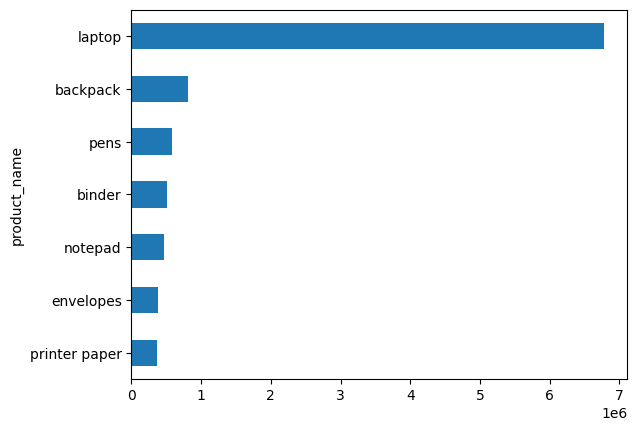

In [5]:
df.groupby('product_name').sales.agg('sum').sort_values().plot(kind='barh')

### 2. Show top 3 products (name) sales by store (location)


In [6]:
sorted_df = df.groupby(['storeLocation', 'product_name'])['sales'].sum().reset_index()
sorted_df = sorted_df.sort_values(by=['storeLocation', 'sales'], ascending=[True, False])
sorted_df.groupby('storeLocation').head(3)

,storeLocation,product_name,sales
3,Austin,laptop,1018494.05
0,Austin,backpack,115217.59
5,Austin,pens,74622.52
10,Denver,laptop,1961659.25
7,Denver,backpack,245679.34
12,Denver,pens,185008.39
17,London,laptop,1073098.72
14,London,backpack,144529.14
19,London,pens,92602.30
24,New York,laptop,694613.32


### 3. Show rankings of each store (location)

In [7]:
df_ranking = df.groupby('storeLocation').sales.agg('sum').sort_values(ascending=False)
df_ranking

storeLocation
Denver       2921009.92
Seattle      2255947.69
London       1583066.79
Austin       1445603.11
New York     1016059.59
San Diego     672885.17
Name: sales, dtype: float64

### 4. Show purchased method by gender table

In [8]:
pd.crosstab(df['customer_gender'], df['purchaseMethod'])

purchaseMethod,In store,Online,Phone
customer_gender,,,
F,8062,4270,1499
M,7571,4314,1722


### 5. Show monthly total sales


In [9]:
# Group by date, and sum the sales
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Group by year and month and sum the sales
monthly_sales = df.groupby(['year', 'month'])['sales'].sum()
# monthly_sales = df.groupby(['date'])['sales'].sum()
monthly_sales


year  month
2013  1        196043.76
      2        147622.59
      3        140700.06
      4        162336.67
      5        179143.37
      6        142132.02
      7        176298.23
      8        130977.22
      9        137871.99
      10       173126.73
      11       148358.38
      12       174306.96
2014  1        125824.02
      2        141174.41
      3        193413.50
      4        132593.08
      5        166896.80
      6        143304.56
      7        184804.60
      8        167979.81
      9        159802.92
      10       149284.84
      11       180564.85
      12       139466.83
2015  1        222577.01
      2        189776.15
      3        178086.94
      4        132298.50
      5        167482.69
      6        149484.34
      7        149510.47
      8        154868.63
      9        135615.80
      10       175215.34
      11       158390.42
      12       166565.02
2016  1        166558.93
      2        120783.52
      3        193185.17
      4      

<Axes: xlabel='date'>

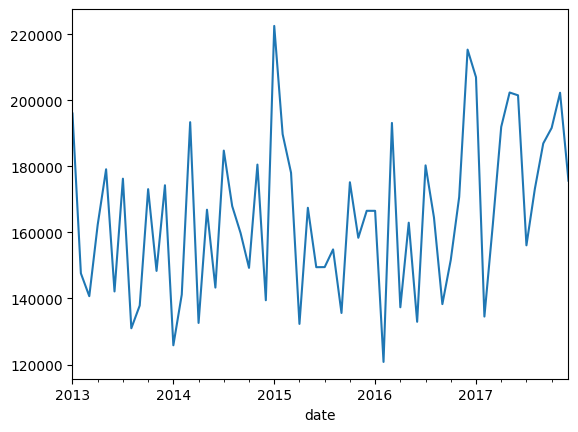

In [10]:
df.groupby(pd.Grouper(key='date',freq='M')).sales.agg('sum').plot()